# Курсовой проект: Библиотеки Python для Data Science: продолжение

**Задача**

На основании имеющихся данных о клиентах банка требуется построить модель для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1($\beta$ = 1) > 0.5 при Precision > 0.5 и Recall > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной **(0 или 1, а НЕ вероятность)** для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

**Подключение библиотек и скриптов**

In [467]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [468]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [469]:
def distribution_plot(series, label):
    """График распределения"""
    plt.figure(figsize=(16, 8))

    mean = round(series.mean(), 2)
    median = series.median()

    plt.subplot(121)
    series.hist(density=False, bins=20)
    plt.ylabel('count')
    plt.xlabel(label)

    y = np.linspace(0, 2000, 2)
    plt.plot([mean] * 2, y, label='mean', linewidth=4)
    plt.plot([median] * 2, y, label='median', linewidth=4)
    plt.legend()

    plt.subplot(122)
    sns.kdeplot(series, shade=True, legend=False)
    plt.xlabel(label)

    plt.suptitle(label)
    plt.show()

In [470]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None
        
    def fit(self, df):
        """Сохранение статистик"""
        pass
#         # Расчет медиан
#         self.medians = df[['Healthcare_1']].median()

    def fill_healthcare_nan(self, df):
        """Заполнение пропусков Healthcare_1"""
#         features = ['Ecology_1', 'Social_1', 'Shops_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'A', 'B']
#         target = 'Healthcare_1'

#         train_df = df[df['Healthcare_1'].notnull()]

#         x = train_df[features]
#         y = train_df[target]
#         model = RandomForestRegressor(max_depth=14, 
#                                       n_estimators=300,
#                                       random_state=55)
#         model.fit(x, y)

#         pred_df = df[df['Healthcare_1'].isna()][features]
#         y_pred = model.predict(pred_df)

#         df.loc[df['Healthcare_1'].isna(), target] = y_pred
        return df
        
    def transform(self, df):
        """Трансформация данных"""
        
        # Обработка категорий
#         df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis=1)
#         df = pd.concat([df, pd.get_dummies(df['Ecology_3'])], axis=1)
#         df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis=1)
        
        # Пропуски
        df['Years in current job'].fillna(value='Not available', inplace=True)
        
#         # Healthcare_1
#         df = self.fill_healthcare_nan(df)
        
#         # По LifeSquare подобрать решение не удалось. Предсказание не показало удовлетворительный r2.
#         # У признака высокая корреляция со Square по районам.
#         df.drop(columns=['LifeSquare'], inplace=True)

#         # Исключение неиспользуемых фич
#         df.drop(columns=['Ecology_2', 'Ecology_3', 'Shops_2'], inplace=True)
        
        return df

def fit_trasform(df):
    pipe = DataPipeline()
    pipe.fit(df)
    return pipe.transform(df)

**Пути к директориям и файлам**

In [471]:
TRAIN_DATASET_PATH = 'course_project_train.csv'
TEST_DATASET_PATH = 'course_project_test.csv'
RESULT_DATASET_PATH = '_predictions.csv.csv'

### Загрузка данных

In [472]:
df = pd.read_csv(TRAIN_DATASET_PATH)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [473]:
df.shape

(7500, 17)

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [475]:
df.isnull().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [476]:
df.nunique()

Home Ownership                     4
Annual Income                   5478
Years in current job              11
Tax Liens                          8
Number of Open Accounts           39
Years of Credit History          408
Maximum Open Credit             6963
Number of Credit Problems          8
Months since last delinquent      89
Bankruptcies                       5
Purpose                           15
Term                               2
Current Loan Amount             5386
Current Credit Balance          6592
Monthly Debt                    6716
Credit Score                     268
Credit Default                     2
dtype: int64

In [477]:
df.select_dtypes(include='object').isna().sum()

Home Ownership            0
Years in current job    371
Purpose                   0
Term                      0
dtype: int64

### Первичный анализ
- Years in current job: Номинативный признак с пропусками. Пропуски означают отсутствие работы;
- Annual Income: Годовой доход с пропусками. Важный параметр для выдачи кредита, но менее важный для прогнозирования невыполнения долговых обязательств по текущему кредиту.
- Months since last delinquent: Количество месяцев с последней просрочки. Пропуски можно заменить на ноль.
- Bankruptcies: Банкротства. Пропуски можно заменить на ноль.
- Credit Score: Следует определить значение по-умолчанию. Среднее, медиана или ноль. Полезно посмотреть распределение.

### Анализ

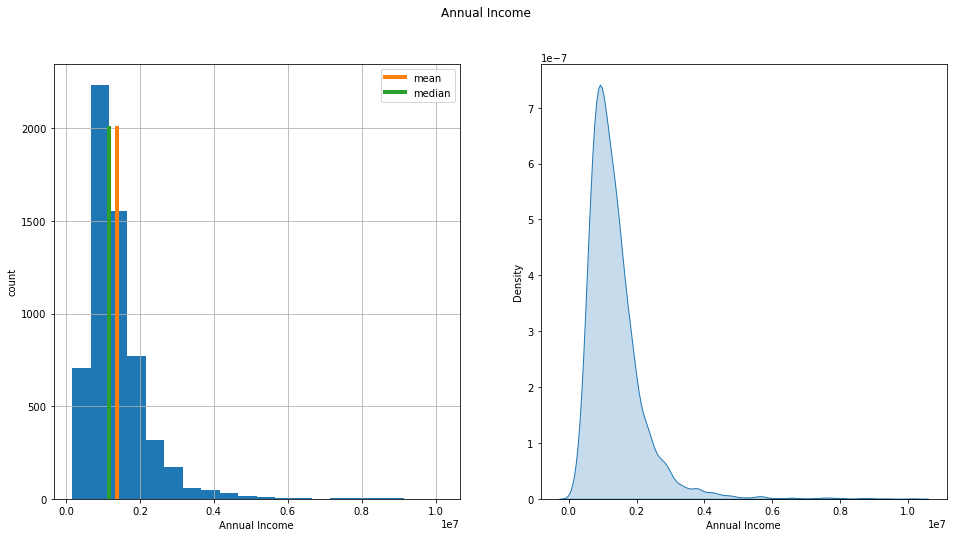

<AxesSubplot:xlabel='Annual Income'>

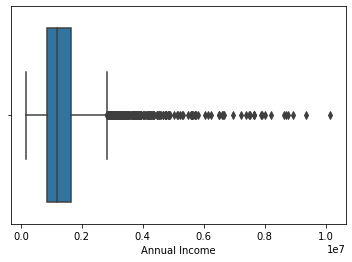

In [478]:
s = df['Annual Income']
distribution_plot(s, 'Annual Income')
sns.boxplot(x=s, whis=1.5)

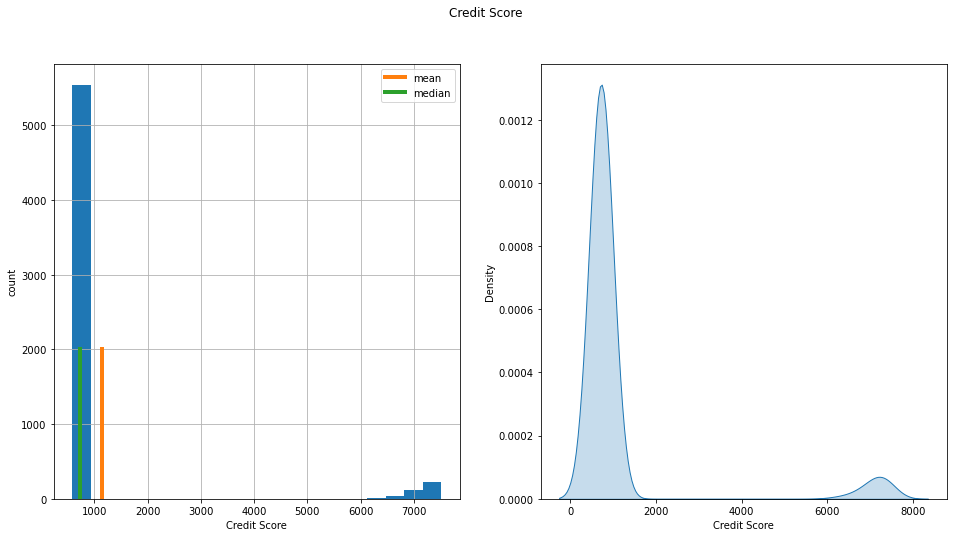

<AxesSubplot:xlabel='Credit Score'>

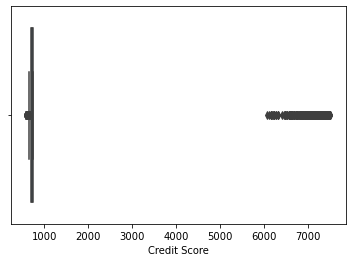

In [479]:
s = df['Credit Score']
distribution_plot(s, 'Credit Score')
sns.boxplot(x=s, whis=1.5)

In [480]:
s.value_counts()

740.0     169
747.0     168
748.0     157
745.0     152
741.0     151
         ... 
602.0       1
616.0       1
585.0       1
620.0       1
7010.0      1
Name: Credit Score, Length: 268, dtype: int64

По данным википедии:
Кредитный скоринг в США
- выше 790 — «великолепно»
- 750—790 — средний стандартный уровень
- 740—750 — «очень хорошо»
- 720—740 — «хорошо»
- 700—720 — «плохо»
- ниже 700 — «очень плохо»

### Построение модели

**Выделение признакового описания и целевой переменной**

In [481]:
# Применение pipeline
df = fit_trasform(df)

In [482]:
TARGET_NAME = 'Credit Default'
FEATURE_NAMES_SELECTED = df.drop(TARGET_NAME, axis=1).columns

In [483]:
# Номинативные данные
CAT_FEATURE_NAMES = [col for col in X.columns if len(X[col].unique()) < 5] 
CAT_FEATURE_NAMES += ['Years in current job', 'Purpose']

for feature in df[CAT_FEATURE_NAMES]:
    print(feature)
    print(f'nunique: {df[feature].nunique()}')
    print(f'unique: {df[feature].unique()}\n')

Home Ownership
nunique: 4
unique: ['Own Home' 'Home Mortgage' 'Rent' 'Have Mortgage']

Term
nunique: 2
unique: ['Short Term' 'Long Term']

Years in current job
nunique: 12
unique: ['Not available' '10+ years' '8 years' '6 years' '7 years' '5 years'
 '1 year' '< 1 year' '4 years' '3 years' '2 years' '9 years']

Purpose
nunique: 15
unique: ['debt consolidation' 'other' 'home improvements' 'take a trip'
 'buy a car' 'small business' 'business loan' 'wedding'
 'educational expenses' 'buy house' 'medical bills' 'moving'
 'major purchase' 'vacation' 'renewable energy']



In [484]:
X = df.dropna()[FEATURE_NAMES_SELECTED]
y = df.dropna()[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=211)

In [485]:
start_model = catb.CatBoostClassifier(n_estimators=100, max_depth=4,
                                      silent=True, random_state=21)
start_model.fit(X_train, y_train, cat_features=CAT_FEATURE_NAMES)

y_train_pred = start_model.predict(X_train)
y_test_pred = start_model.predict(X_test)
y_test_pred_probs = start_model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1475
           1       0.95      0.38      0.55       568

    accuracy                           0.82      2043
   macro avg       0.88      0.69      0.72      2043
weighted avg       0.85      0.82      0.79      2043

TEST

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       520
           1       0.82      0.36      0.50       161

    accuracy                           0.83       681
   macro avg       0.82      0.67      0.70       681
weighted avg       0.83      0.83      0.80       681

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               507  13
1               103  58


### Построение pipeline, проверка гипотез

In [486]:
df.dropna().shape

(2724, 17)

In [487]:
# + Теория 1: Years in current job: заполнить пропуски 0 years
# - Теория 2: Years in current job: заполнить пропуски < 1 years
# -(Падение f1) Теория 3: Пропуски Annual Income = median и Credit Score = 750
# - Теория 4: Выбросы? Credit Score > 5000 / 10
# - Теория 5: Nil доход заменять на 0?

In [488]:
median = df['Annual Income'].median()

In [489]:
# df['Annual Income'].fillna(value=median, inplace=True)
# df['Credit Score'].fillna(value=720, inplace=True)

In [490]:
df['Annual Income'].max()

10149344.0

In [491]:
df.dropna().shape

(2724, 17)

In [492]:
df.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [493]:
X = df.dropna()[FEATURE_NAMES_SELECTED]
y = df.dropna()[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=211)

model = catb.CatBoostClassifier(n_estimators=100, max_depth=4,
                                      silent=True, random_state=21)
model.fit(X_train, y_train, cat_features=CAT_FEATURE_NAMES)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred_probs = model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1475
           1       0.95      0.38      0.55       568

    accuracy                           0.82      2043
   macro avg       0.88      0.69      0.72      2043
weighted avg       0.85      0.82      0.79      2043

TEST

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       520
           1       0.82      0.36      0.50       161

    accuracy                           0.83       681
   macro avg       0.82      0.67      0.70       681
weighted avg       0.83      0.83      0.80       681

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               507  13
1               103  58


In [494]:
X = df.drop(columns=['Credit Score', 'Annual Income']).dropna()[FEATURE_NAMES_SELECTED.drop(['Credit Score', 'Annual Income'])]
y = df.drop(columns=['Credit Score', 'Annual Income']).dropna()[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=211)

model = catb.CatBoostClassifier(n_estimators=100, max_depth=4,
                                      silent=True, random_state=21)
model.fit(X_train, y_train, cat_features=CAT_FEATURE_NAMES)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred_probs = model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.75      0.97      0.85      1816
           1       0.75      0.18      0.30       737

    accuracy                           0.75      2553
   macro avg       0.75      0.58      0.57      2553
weighted avg       0.75      0.75      0.69      2553

TEST

              precision    recall  f1-score   support

           0       0.74      0.96      0.84       610
           1       0.60      0.14      0.23       242

    accuracy                           0.73       852
   macro avg       0.67      0.55      0.53       852
weighted avg       0.70      0.73      0.66       852

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               587  23
1               207  35


In [495]:
X = df.drop(columns=['Annual Income']).dropna()[FEATURE_NAMES_SELECTED.drop(['Annual Income'])]
y = df.drop(columns=['Annual Income']).dropna()[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=211)

model = catb.CatBoostClassifier(n_estimators=100, max_depth=4,
                                      silent=True, random_state=21)
model.fit(X_train, y_train, cat_features=CAT_FEATURE_NAMES)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred_probs = model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1475
           1       0.98      0.35      0.51       568

    accuracy                           0.82      2043
   macro avg       0.89      0.67      0.70      2043
weighted avg       0.85      0.82      0.78      2043

TEST

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       520
           1       0.83      0.35      0.50       161

    accuracy                           0.83       681
   macro avg       0.83      0.67      0.70       681
weighted avg       0.83      0.83      0.80       681

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               508  12
1               104  57


In [496]:
X = df.drop(columns=['Credit Score']).dropna()[FEATURE_NAMES_SELECTED.drop(['Credit Score'])]
y = df.drop(columns=['Credit Score']).dropna()[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=211)

model = catb.CatBoostClassifier(n_estimators=100, max_depth=4,
                                      silent=True, random_state=21)
model.fit(X_train, y_train, cat_features=CAT_FEATURE_NAMES)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred_probs = model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1475
           1       0.82      0.22      0.35       568

    accuracy                           0.77      2043
   macro avg       0.79      0.60      0.60      2043
weighted avg       0.78      0.77      0.72      2043

TEST

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       520
           1       0.57      0.17      0.27       161

    accuracy                           0.77       681
   macro avg       0.68      0.57      0.57       681
weighted avg       0.74      0.77      0.72       681

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               499  21
1               133  28


In [497]:
# Корелляция с базовыми признаками
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()

**Обзор распределения**

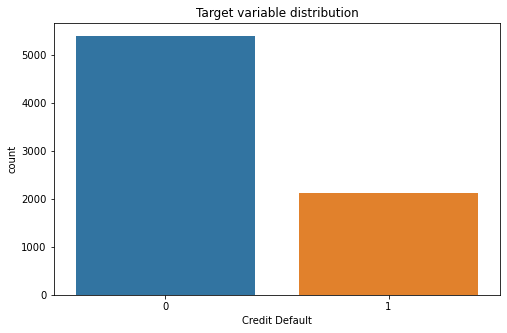

In [498]:
plt.figure(figsize=(8, 5))

sns.countplot(x=TARGET_NAME, data=df)

plt.title('Target variable distribution')
plt.show()

**Корреляция с базовыми признаками**

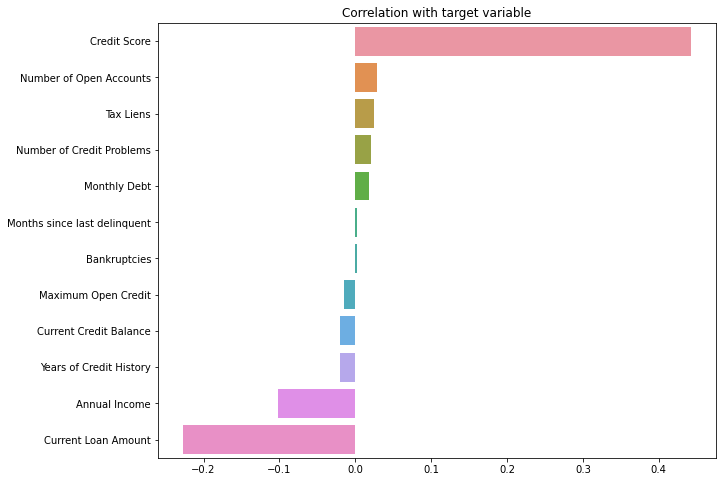

In [499]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Оценка признака "Credit Score" в разрезе целевой переменной**

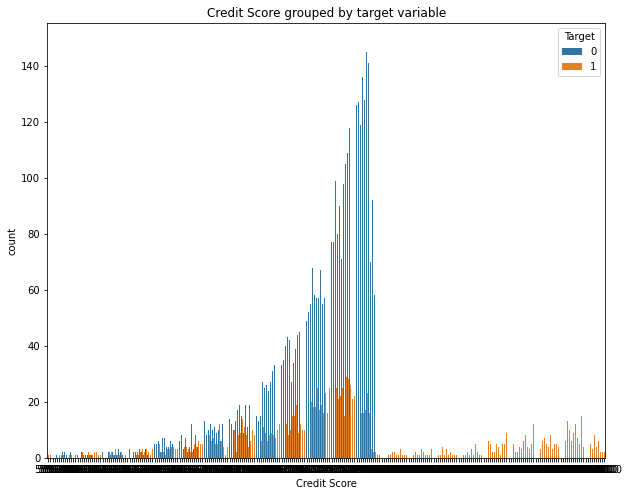

In [500]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Credit Score", hue=TARGET_NAME, data=df)
plt.title('Credit Score grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [501]:
# + Теория: При Credit Score выше 800 означает 100% невыплату кредита в следующий месяц

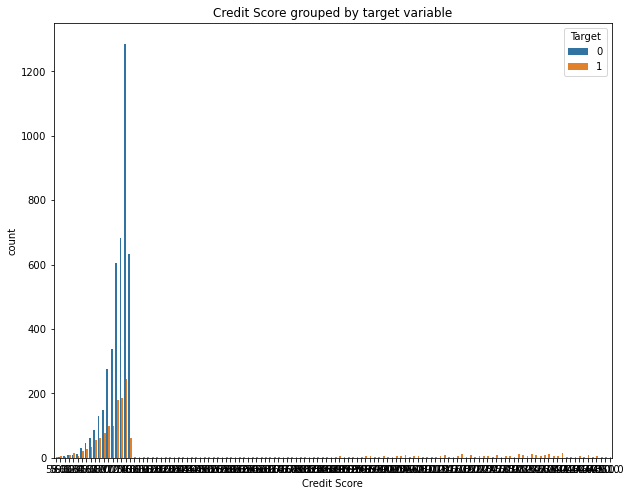

In [502]:
plt.figure(figsize=(10, 8))

# df1 = df[df['Credit Score'] < 800].copy()
df1 = df.copy()
df1['Credit Score'] /= 10
df1['Credit Score'] = df1['Credit Score'].round()
sns.countplot(x="Credit Score", hue=TARGET_NAME, data=df1)
plt.title('Credit Score grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [503]:
df[df['Credit Score'] >= 800]['Credit Default'].value_counts()

1    400
Name: Credit Default, dtype: int64

In [504]:
df1['Credit Score'].nunique()

128

In [505]:
df1['Credit Score'].value_counts()

74.0     1530
73.0      867
72.0      785
75.0      697
71.0      437
         ... 
691.0       1
641.0       1
678.0       1
680.0       1
662.0       1
Name: Credit Score, Length: 128, dtype: int64

In [506]:
df1.loc[df1['Credit Score'] >= 80, 'Credit Score'] = 80

In [511]:
df1.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                       0
Credit Default                     0
dtype: int64

In [509]:
df1.loc[df1['Credit Score'].isna(), 'Credit Score'] = 0

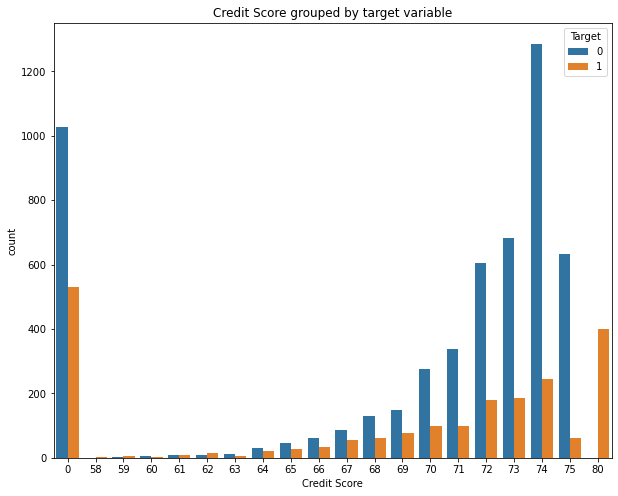

In [591]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Credit Score", hue=TARGET_NAME, data=df1)
plt.title('Credit Score grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [518]:
CAT_FEATURE_NAMES.append('Credit Score')

In [531]:
X = df1.drop(columns=['Annual Income']).dropna()[FEATURE_NAMES_SELECTED.drop(['Annual Income'])]
y = df1.drop(columns=['Annual Income']).dropna()[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=211)

model = catb.CatBoostClassifier(n_estimators=100, max_depth=4,
                                      silent=True, random_state=21)
model.fit(X_train, y_train, cat_features=CAT_FEATURE_NAMES)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred_probs = model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.99      0.87      1816
           1       0.91      0.34      0.50       737

    accuracy                           0.80      2553
   macro avg       0.85      0.66      0.68      2553
weighted avg       0.82      0.80      0.77      2553

TEST

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       610
           1       0.78      0.26      0.40       242

    accuracy                           0.77       852
   macro avg       0.77      0.62      0.63       852
weighted avg       0.77      0.77      0.73       852

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               592  18
1               178  64


In [526]:
df1['Credit Score'] = df1['Credit Score'].astype(int)

In [530]:
df1.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                      int64
Credit Default                    int64
dtype: object

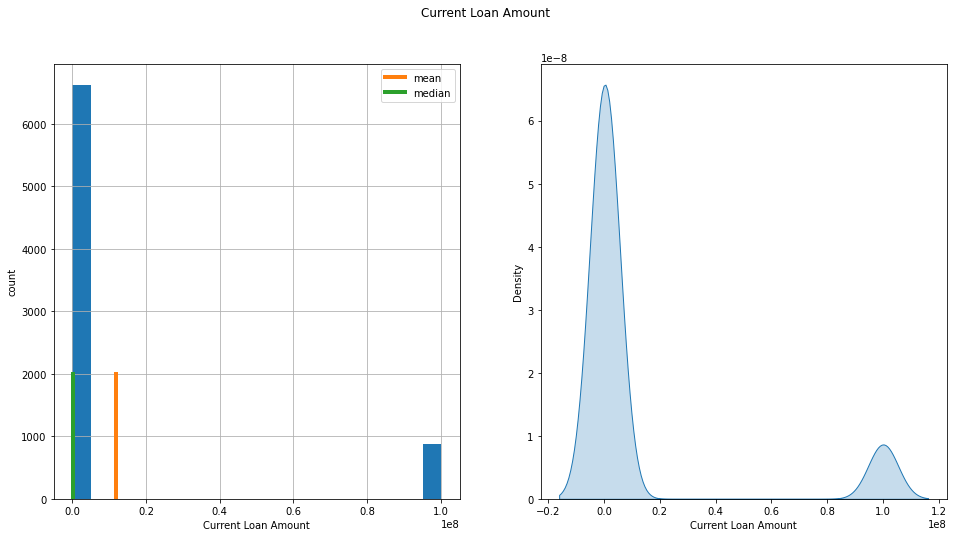

<AxesSubplot:xlabel='Current Loan Amount'>

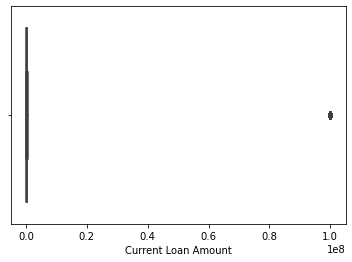

In [532]:
s = df['Current Loan Amount']
distribution_plot(s, 'Current Loan Amount')
sns.boxplot(x=s, whis=1.5)

In [534]:
s.value_counts()

99999999.0    870
89298.0         6
218064.0        6
216106.0        5
270226.0        5
             ... 
490006.0        1
404756.0        1
194414.0        1
420376.0        1
33792.0         1
Name: Current Loan Amount, Length: 5386, dtype: int64

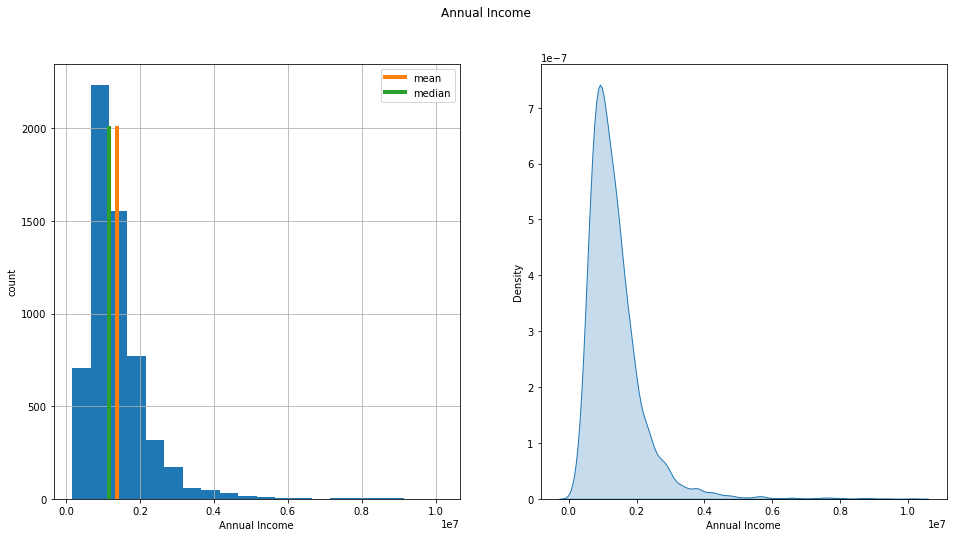

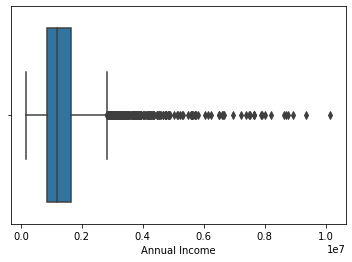

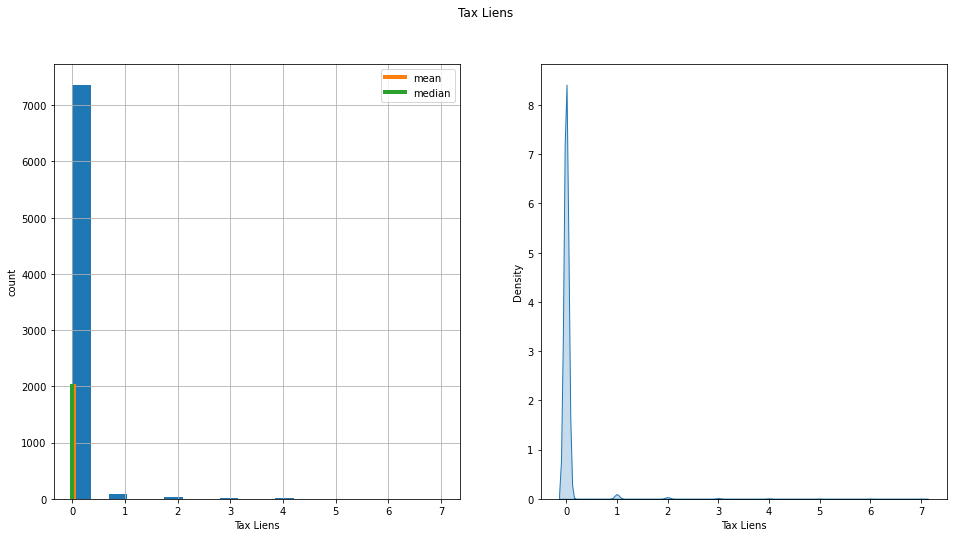

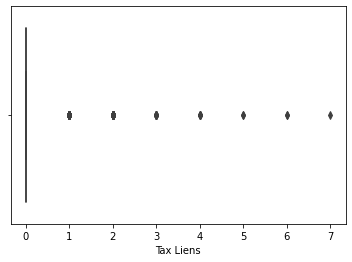

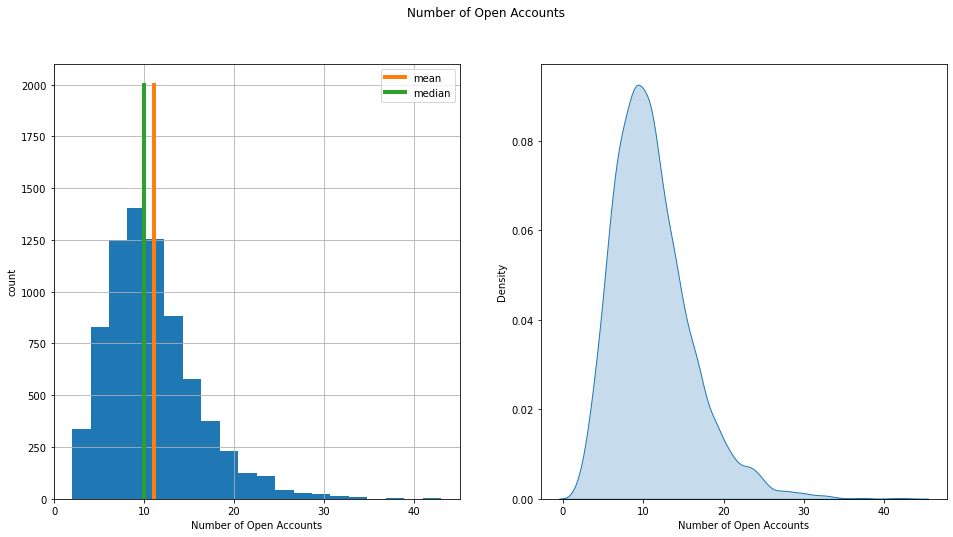

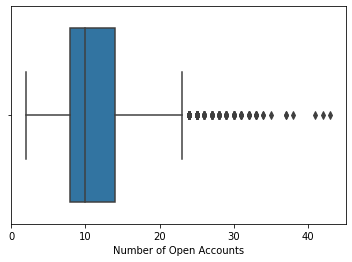

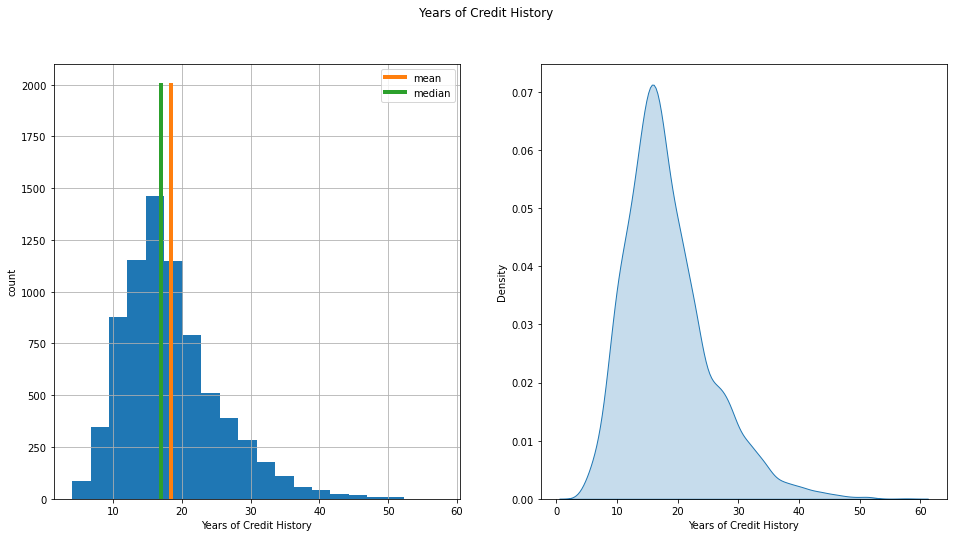

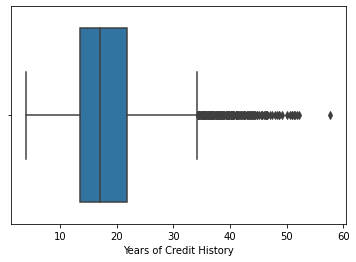

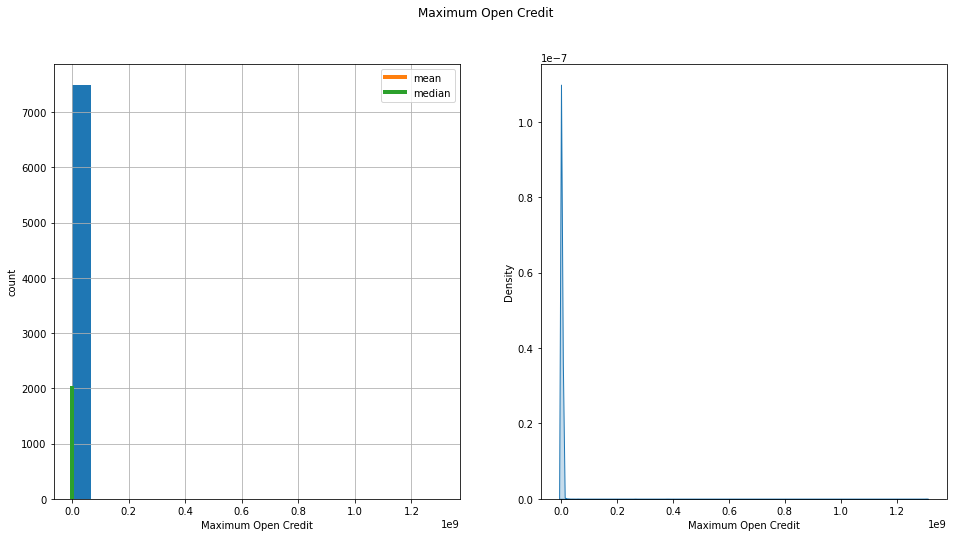

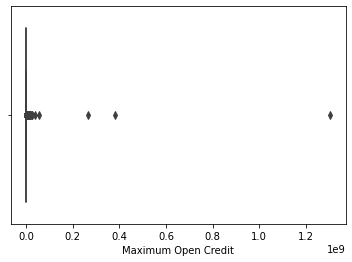

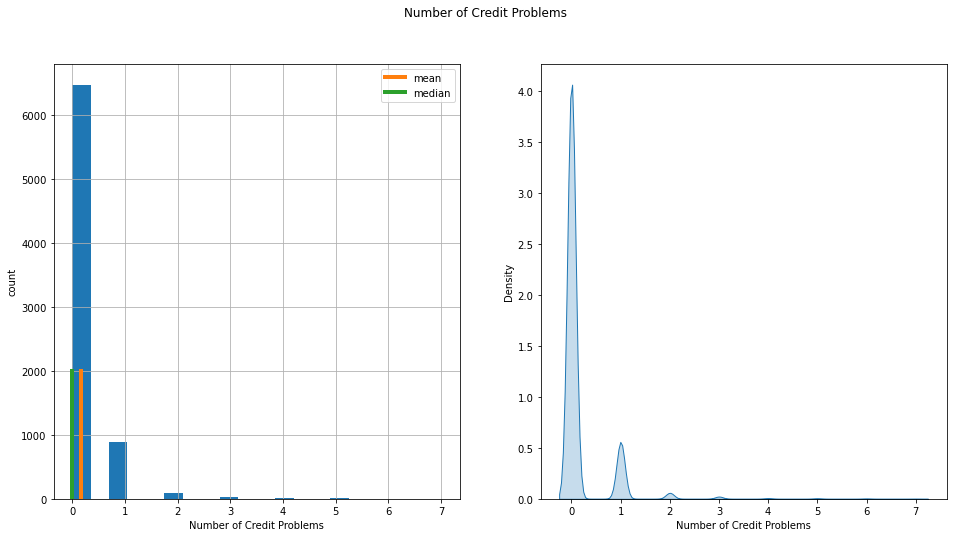

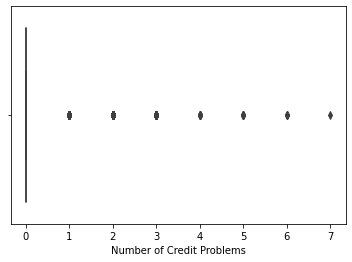

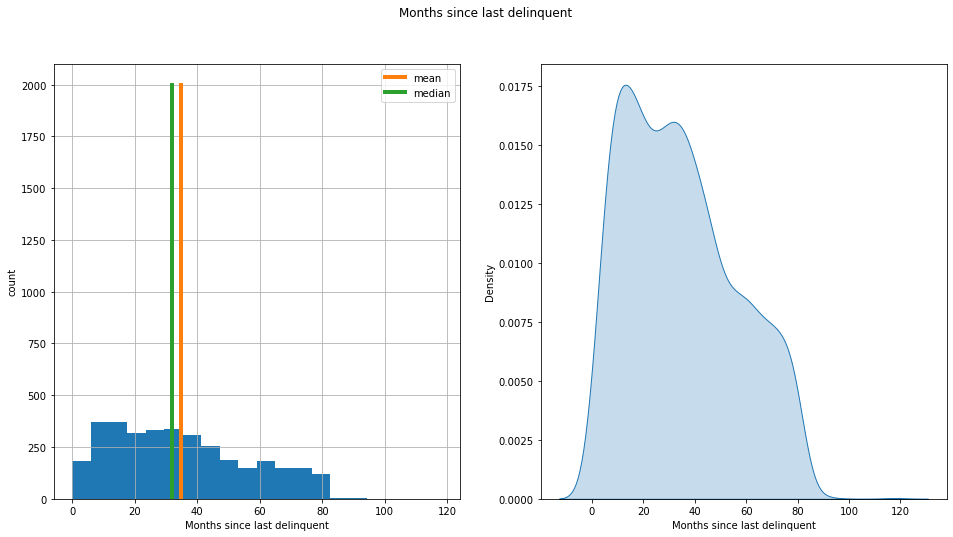

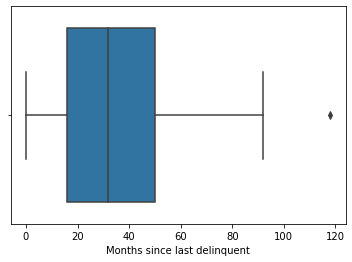

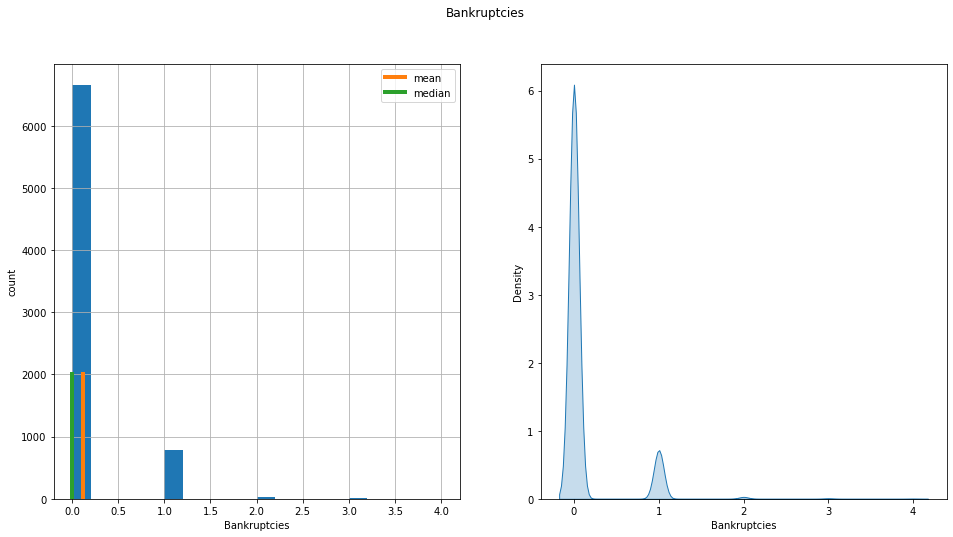

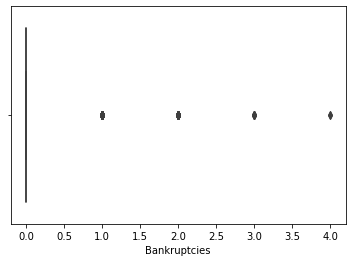

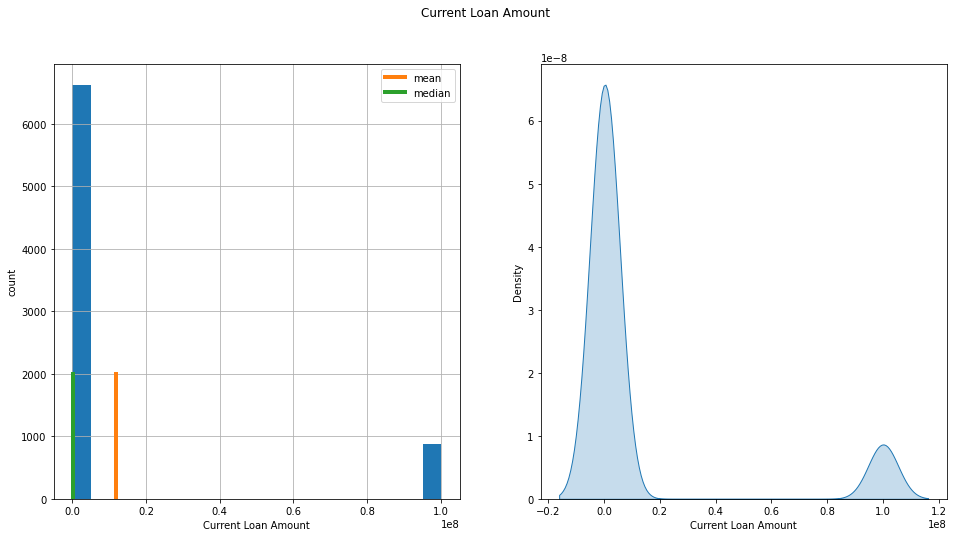

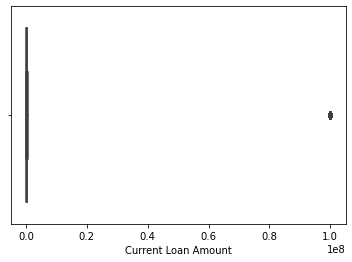

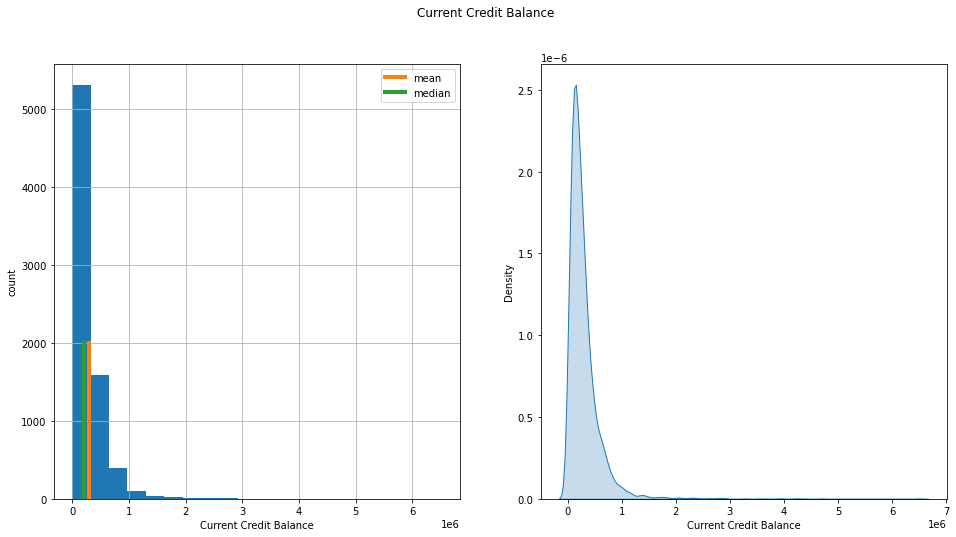

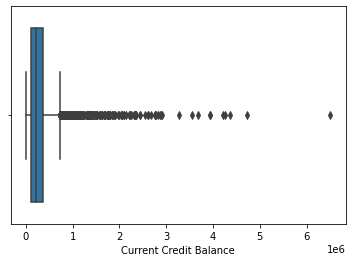

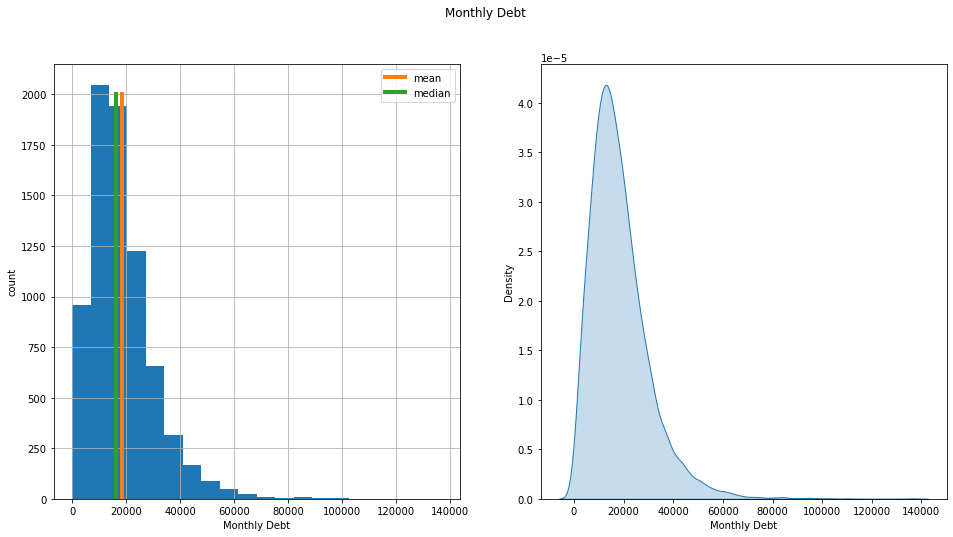

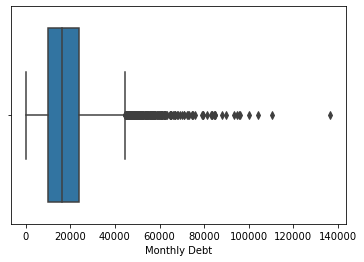

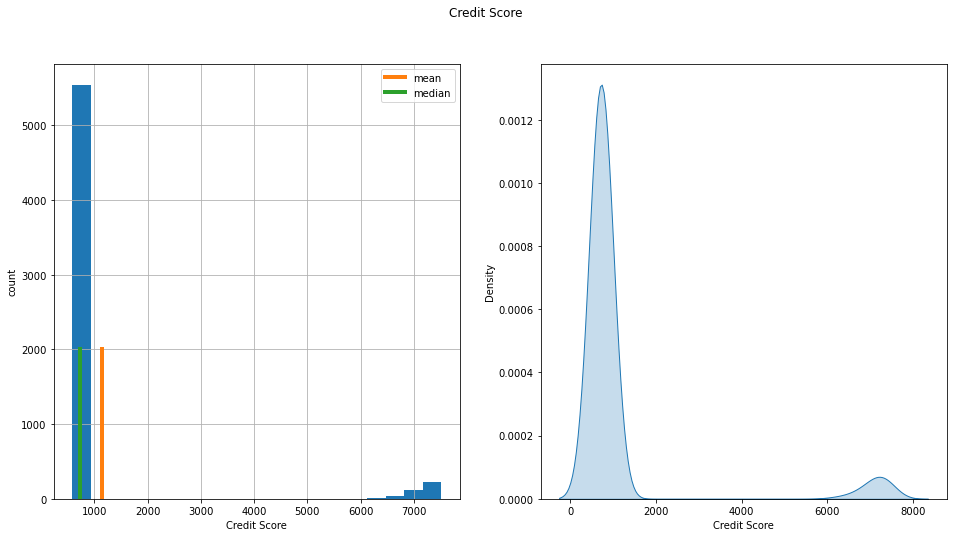

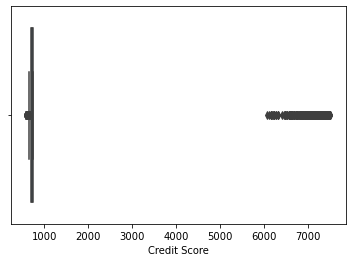

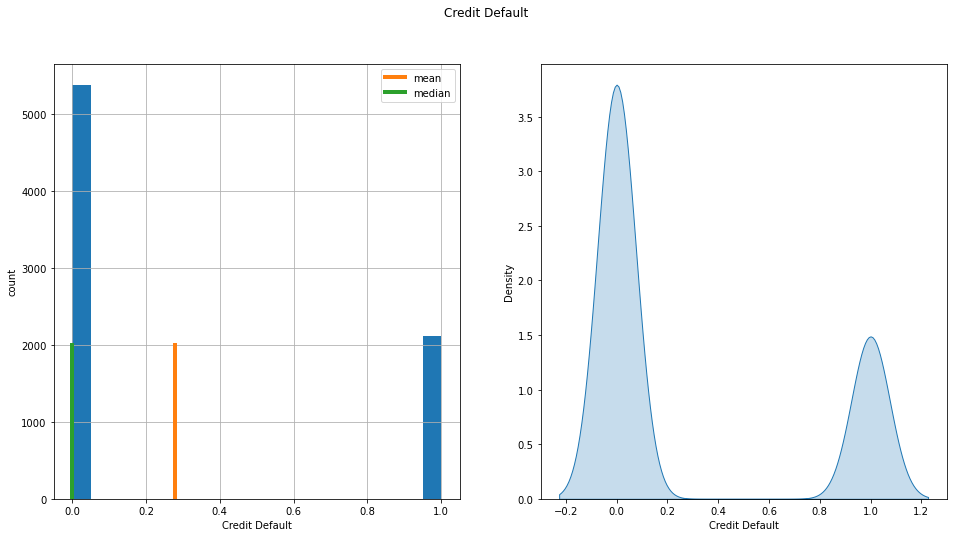

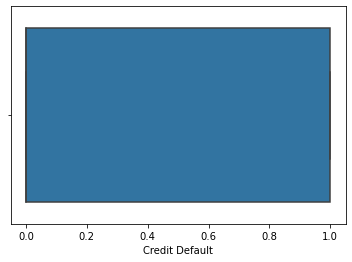

In [535]:
for c in df.select_dtypes(include=['float64', 'int64']).columns.to_list():
    s = df[c]
    distribution_plot(s, c)
    sns.boxplot(x=s, whis=1.5)

In [543]:
df2 = df1.copy()
df2['Annual Income'].fillna(value=median, inplace=True)

In [544]:
df2.isna().sum()

Home Ownership                     0
Annual Income                      0
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                       0
Credit Default                     0
dtype: int64

In [545]:
X = df2.dropna()[FEATURE_NAMES_SELECTED]
y = df2.dropna()[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=211)

model = catb.CatBoostClassifier(n_estimators=100, max_depth=4,
                                      silent=True, random_state=21)
model.fit(X_train, y_train, cat_features=CAT_FEATURE_NAMES)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred_probs = model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1816
           1       0.89      0.36      0.51       737

    accuracy                           0.80      2553
   macro avg       0.84      0.67      0.70      2553
weighted avg       0.82      0.80      0.77      2553

TEST

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       610
           1       0.79      0.27      0.40       242

    accuracy                           0.77       852
   macro avg       0.78      0.62      0.63       852
weighted avg       0.78      0.77      0.73       852

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               593  17
1               177  65


In [546]:
df1['Credit Score'].value_counts()

0     1557
74    1530
73     867
72     785
75     697
71     437
80     400
70     376
69     223
68     192
67     140
66      95
65      73
64      49
62      23
63      20
61      17
59       9
60       9
58       1
Name: Credit Score, dtype: int64

### Проверка статистиеской гипотезы

In [565]:
credit_score_and_target_s = df1.loc[df1['Credit Score'].isin([69, 0]), ['Credit Score', TARGET_NAME]].sample(1000)
credit_score_and_target_s['ID'] = credit_score_and_target_s.index
credit_score_and_target_s

,Credit Score,Credit Default,ID
9,0,1,9
4895,0,0,4895
2827,69,1,2827
4796,0,1,4796
6133,69,0,6133
...,...,...,...
385,0,1,385
7266,69,1,7266
1191,69,0,1191
24,0,0,24


In [566]:
table = credit_score_and_target_s.pivot_table(values='ID', index='Credit Score', columns=TARGET_NAME, aggfunc='count')
table

Credit Default,0,1
Credit Score,,
0,602,280
69,77,41


In [567]:
from scipy.stats import chi2_contingency

In [568]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.5121483119969876

In [574]:
credit_score_and_target_s = df1.loc[df1['Credit Score'].isin([69, 0]), ['Credit Score', TARGET_NAME]].sample(1000)
credit_score_and_target_s['ID'] = credit_score_and_target_s.index
print(credit_score_and_target_s)
table = credit_score_and_target_s.pivot_table(values='ID', index='Credit Score', columns=TARGET_NAME, aggfunc='count')
print(table)
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

      Credit Score  Credit Default    ID
4437             0               0  4437
6177             0               0  6177
6518             0               1  6518
4784             0               0  4784
3892             0               0  3892
...            ...             ...   ...
3882            69               0  3882
2099             0               0  2099
1622             0               0  1622
2985             0               0  2985
23               0               1    23

[1000 rows x 3 columns]
Credit Default    0    1
Credit Score            
0               588  297
69               76   39


0.9397779752807496

In [578]:
credit_score_and_target_s = df1.loc[df1['Credit Score'].isin([71, 72]), ['Credit Score', TARGET_NAME]].sample(200)
credit_score_and_target_s['ID'] = credit_score_and_target_s.index
print(credit_score_and_target_s)
table = credit_score_and_target_s.pivot_table(values='ID', index='Credit Score', columns=TARGET_NAME, aggfunc='count')
print(table)
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

      Credit Score  Credit Default    ID
3352            72               0  3352
3456            72               0  3456
5840            72               0  5840
3814            72               1  3814
5318            72               0  5318
...            ...             ...   ...
978             71               0   978
2021            71               1  2021
5330            72               1  5330
920             72               1   920
4421            72               0  4421

[200 rows x 3 columns]
Credit Default   0   1
Credit Score          
71              60  16
72              93  31


0.5227800525833601

In [585]:
df3 = df2.copy()

In [588]:
df3['Credit Score'].value_counts()

0     1557
74    1530
73     867
72     785
75     697
71     437
80     400
70     376
69     223
68     192
67     140
66      95
65      73
64      49
62      23
63      20
61      17
59       9
60       9
58       1
Name: Credit Score, dtype: int64

In [589]:
df3.loc[df3['Credit Score'] == 0, 'Credit Score'] = 69

In [590]:
X = df3.dropna()[FEATURE_NAMES_SELECTED]
y = df3.dropna()[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=211)

model = catb.CatBoostClassifier(n_estimators=100, max_depth=4,
                                      silent=True, random_state=21)
model.fit(X_train, y_train, cat_features=CAT_FEATURE_NAMES)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred_probs = model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1816
           1       0.88      0.37      0.52       737

    accuracy                           0.80      2553
   macro avg       0.84      0.67      0.70      2553
weighted avg       0.82      0.80      0.77      2553

TEST

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       610
           1       0.77      0.28      0.41       242

    accuracy                           0.77       852
   macro avg       0.77      0.62      0.63       852
weighted avg       0.77      0.77      0.73       852

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               590  20
1               175  67


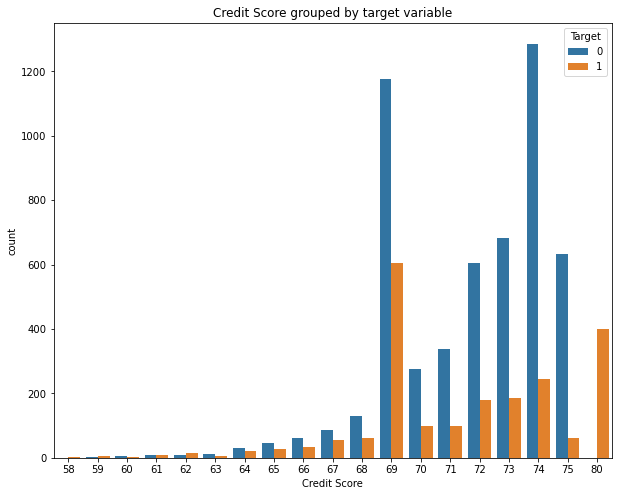

In [592]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Credit Score", hue=TARGET_NAME, data=df3)
plt.title('Credit Score grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [624]:
test_df = df3.copy()
values = np.sort(test_df['Credit Score'].unique())
cur = 0
end = len(values)
step = 1
while cur < end - 1:
    credit_score_and_target_s = test_df.loc[test_df['Credit Score'].isin([values[cur], values[cur+step]]), ['Credit Score', TARGET_NAME]]
    credit_score_and_target_s['ID'] = credit_score_and_target_s.index
#     print(credit_score_and_target_s)
    table = credit_score_and_target_s.pivot_table(values='ID', index='Credit Score', columns=TARGET_NAME, aggfunc='count')
#     print(table)
    chi2, p, dof, expected = chi2_contingency(table, correction=False)
    if p > 0.05:
        step += 1
        if values[cur] != values[cur+step-1]:
            print(f'{values[cur]} - {values[cur+step-1]}: {p}')
    else:
        step = 1
        cur += 1

59 - 60: 0.15729920705028105
59 - 61: 0.5003523731064727
59 - 62: 0.7607052535729718
59 - 63: 0.11265420391072284
59 - 64: 0.1517713778190382
59 - 65: 0.08667881530421268
59 - 66: 0.08013671220850635
59 - 67: 0.09573977776149899
60 - 61: 0.34001781862566155
60 - 62: 0.16048496760673192
60 - 63: 0.9303862304862558
60 - 64: 0.6731680802431669
60 - 65: 0.8300239094161025
60 - 66: 0.8345065284596327
60 - 67: 0.7539650179785697
60 - 68: 0.9216606177053657
60 - 69: 0.9669704664204157
60 - 70: 0.6379896298691367
60 - 71: 0.46152049516701055
60 - 72: 0.45486097948858173
60 - 73: 0.38870450480675234
60 - 74: 0.15655266386470537
61 - 62: 0.6160647788983531
61 - 63: 0.2722936273128258
61 - 64: 0.3854476659307856
61 - 65: 0.226527965402805
61 - 66: 0.21066338952640729
61 - 67: 0.25368668716780707
61 - 68: 0.07628895424085406
61 - 69: 0.10104239263779315
62 - 63: 0.09051162675415132
62 - 64: 0.11201283812957366
63 - 64: 0.6533320833199645
63 - 65: 0.8701900161005749
63 - 66: 0.8764204657047345
63 -

In [616]:
values = np.sort(df3['Credit Score'].unique())
values

array([58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 80])

In [613]:
df3['Credit Score'].unique()

array([75, 74, 69, 72, 70, 71, 73, 64, 67, 80, 65, 62, 68, 66, 63, 58, 59,
       61, 60])

In [ ]:

credit_score_and_target_s = df1.loc[df1['Credit Score'].isin([71, 72]), ['Credit Score', TARGET_NAME]].sample(200)
credit_score_and_target_s['ID'] = credit_score_and_target_s.index
print(credit_score_and_target_s)
table = credit_score_and_target_s.pivot_table(values='ID', index='Credit Score', columns=TARGET_NAME, aggfunc='count')
print(table)
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

In [631]:
df4 = df3.copy()

In [646]:
df4['Credit Score'].value_counts()

69    2280
73    2089
74    1530
75     697
80     400
70     376
64     128
Name: Credit Score, dtype: int64

In [645]:
df4.loc[df4['Credit Score'].between(0, 64), 'Credit Score'] = 64

In [643]:
df4.loc[df4['Credit Score'].between(65, 69), 'Credit Score'] = 69
df4.loc[df4['Credit Score'].between(71, 73), 'Credit Score'] = 73

In [647]:
X = df4.dropna()[FEATURE_NAMES_SELECTED]
y = df4.dropna()[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=211)

model = catb.CatBoostClassifier(n_estimators=100, max_depth=4,
                                      silent=True, random_state=21)
model.fit(X_train, y_train, cat_features=CAT_FEATURE_NAMES)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred_probs = model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1816
           1       0.85      0.38      0.52       737

    accuracy                           0.80      2553
   macro avg       0.82      0.68      0.70      2553
weighted avg       0.81      0.80      0.77      2553

TEST

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       610
           1       0.77      0.29      0.43       242

    accuracy                           0.77       852
   macro avg       0.77      0.63      0.64       852
weighted avg       0.77      0.77      0.74       852

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               589  21
1               171  71


In [655]:
def make_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=211)

    model = catb.CatBoostClassifier(n_estimators=100, max_depth=4,
                                      silent=True, random_state=21)
    model.fit(X_train, y_train, cat_features=CAT_FEATURE_NAMES)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_pred_probs = model.predict_proba(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

#### Вывод - разделение Credit Score на категории повысило f1-score

In [648]:
# Оставшиеся выбросы

In [649]:
df4.isna().sum()

Home Ownership                     0
Annual Income                      0
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                       0
Credit Default                     0
dtype: int64

#### Months since last delinquent и Bankruptcies
Корреляции с базовым признаком почти нет

### Важность признаков

In [652]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (14, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()

    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

/Users/maximdoroshenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


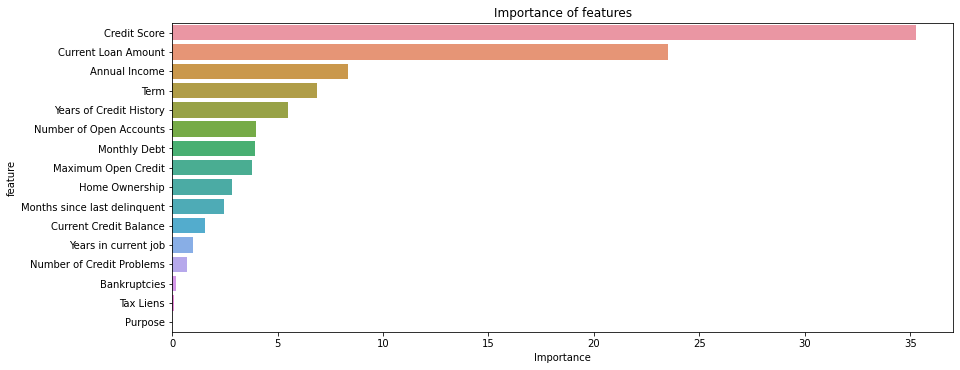

In [653]:
important_features_top = show_feature_importances(X_train.columns, 
                                                  model.feature_importances_, 
                                                  get_top=15)

Признаки Bankruptcies, Tax Liens - малозначимы, Purpose - вообще не важен.
Months since last delinquent - важен.

In [654]:
# + (f1, recall - повысилось) Теория: drop Purpose не ухудшит f1-score и recall

In [659]:
df5 = df4.copy()
df5.drop(columns='Purpose', inplace=True)

In [667]:
CAT_FEATURE_NAMES.remove('Purpose')

In [668]:
X = df5.dropna()[FEATURE_NAMES_SELECTED.drop(['Purpose'])]
y = df5.dropna()[TARGET_NAME]

make_model(X, y)

TRAIN

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1816
           1       0.86      0.38      0.53       737

    accuracy                           0.80      2553
   macro avg       0.83      0.68      0.70      2553
weighted avg       0.81      0.80      0.78      2553

TEST

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       610
           1       0.76      0.31      0.44       242

    accuracy                           0.77       852
   macro avg       0.77      0.63      0.65       852
weighted avg       0.77      0.77      0.74       852

CONFUSION MATRIX

col_0             0   1
Credit Default         
0               586  24
1               168  74


#### Заполнение пропусков Months since last delinquent

In [689]:
df6 = df5.copy()

In [690]:
df6.loc[df6['Months since last delinquent'].isna(), 'Months since last delinquent'] = -1

In [691]:
df6.isna().sum()

Home Ownership                   0
Annual Income                    0
Years in current job             0
Tax Liens                        0
Number of Open Accounts          0
Years of Credit History          0
Maximum Open Credit              0
Number of Credit Problems        0
Months since last delinquent     0
Bankruptcies                    14
Term                             0
Current Loan Amount              0
Current Credit Balance           0
Monthly Debt                     0
Credit Score                     0
Credit Default                   0
dtype: int64

In [674]:
X = df6.dropna()[FEATURE_NAMES_SELECTED.drop(['Purpose', 'Months since last delinquent'])]
y = df6.dropna()[TARGET_NAME]

make_model(X, y)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      4032
           1       0.86      0.32      0.47      1582

    accuracy                           0.79      5614
   macro avg       0.83      0.65      0.67      5614
weighted avg       0.81      0.79      0.76      5614

TEST

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1345
           1       0.77      0.27      0.40       527

    accuracy                           0.77      1872
   macro avg       0.77      0.62      0.63      1872
weighted avg       0.77      0.77      0.73      1872

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1302   43
1                386  141


In [675]:
X = df6.dropna()[FEATURE_NAMES_SELECTED.drop(['Purpose'])]
y = df6.dropna()[TARGET_NAME]

make_model(X, y)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      4032
           1       0.89      0.31      0.46      1582

    accuracy                           0.80      5614
   macro avg       0.84      0.65      0.67      5614
weighted avg       0.81      0.80      0.76      5614

TEST

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1345
           1       0.78      0.26      0.39       527

    accuracy                           0.77      1872
   macro avg       0.78      0.61      0.62      1872
weighted avg       0.77      0.77      0.73      1872

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1307   38
1                391  136


In [676]:
# Простое присвоение - 1 дало понижение f1 и recal

In [687]:
df6 = df5.copy()

In [693]:
df6[df6['Months since last delinquent'] == -1].head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,Not available,0.0,11.0,26.3,685960.0,1.0,-1.0,1.0,Short Term,99999999.0,47386.0,7914.0,75,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,-1.0,0.0,Long Term,264968.0,394972.0,18373.0,74,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,-1.0,0.0,Short Term,99999999.0,308389.0,13651.0,74,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,-1.0,1.0,Short Term,121396.0,95855.0,11338.0,69,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,-1.0,0.0,Short Term,125840.0,93309.0,7180.0,73,0


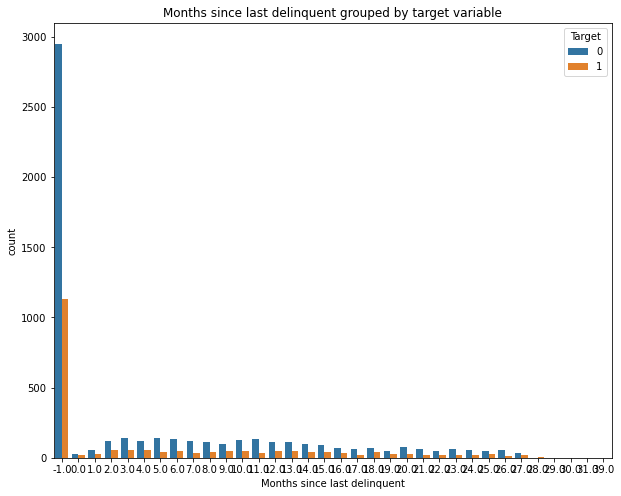

In [694]:
plt.figure(figsize=(10, 8))

# df6 = df6[df6['Months since last delinquent'] > 0]
df6.loc[df6['Months since last delinquent'] > 0, 'Months since last delinquent'] /= 3
df6['Months since last delinquent'] = df6['Months since last delinquent'].round()

sns.countplot(x="Months since last delinquent", hue=TARGET_NAME, data=df6)
plt.title('Months since last delinquent grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [679]:
df6['Months since last delinquent'].value_counts()

-1.0      4081
 14.0       76
 29.0       71
 8.0        68
 33.0       68
          ... 
 84.0        1
 92.0        1
 86.0        1
 118.0       1
 91.0        1
Name: Months since last delinquent, Length: 90, dtype: int64

In [714]:
# Теория: Заменить пропуски Months since last delinquent на -24- 12

In [712]:
df7 = df5.copy()
df7.loc[df7['Months since last delinquent'].isna(), 'Months since last delinquent'] = 12

In [713]:
X = df7.dropna()[FEATURE_NAMES_SELECTED.drop(['Purpose'])]
y = df7.dropna()[TARGET_NAME]

make_model(X, y)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      4032
           1       0.87      0.33      0.47      1582

    accuracy                           0.80      5614
   macro avg       0.83      0.65      0.67      5614
weighted avg       0.81      0.80      0.76      5614

TEST

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      1345
           1       0.80      0.28      0.41       527

    accuracy                           0.78      1872
   macro avg       0.79      0.63      0.64      1872
weighted avg       0.78      0.78      0.74      1872

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1309   36
1                380  147


In [715]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
      
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.axhline(0.5, color="red")
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=0.5)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [721]:
from sklearn.metrics import precision_score, recall_score, f1_score

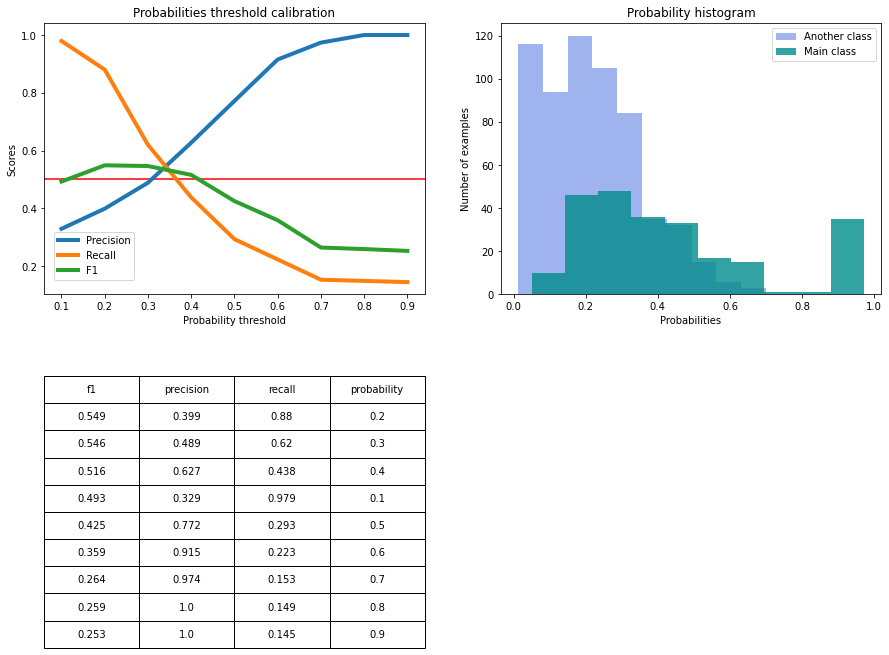

In [722]:
# model.fit(X_train, y_train, cat_features=CAT_FEATURE_NAMES)
y_test_pred_probs = model.predict_proba(X_test)[:, 1]
show_proba_calibration_plots(y_test_pred_probs, y_test)

In [723]:
# При probality ~= 0.35 результат оптимальный